In [2]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
import os as os
import datetime as dt

In [3]:
# Replace the path below with the actual path to your CSV file if it's not in the same directory as your Jupyter Notebook
file_path = 'commodities_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)


In [4]:
# Convert the datetime column to a datetime object
#df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')

# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
# Display the first few rows of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.8+ GB


In [5]:
df.head()

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00


In [6]:
# Group by 'item.class' and count unique 'item.id'
class_counts = df.groupby('item.class')['item.id'].nunique()

print("Number of unique items for each item class:")
print(class_counts)

Number of unique items for each item class:
item.class
Armor              11
Consumables      3201
Gems             1003
Glyphs            111
Miscellaneous    1979
Recipes             3
Trade Goods      2093
Unknown           701
Name: item.id, dtype: int64


In [7]:
print(df['unit_price'].head())


0     109400
1       2000
2       2400
3     290200
4    9707000
Name: unit_price, dtype: int64


In [8]:
df['unit_price'].dtype

dtype('int64')

In [10]:
# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format
# Correct unit_price to gold by dividing by 10000
df['unit_price'] = df['unit_price']/10000
# Look at the unit_price of Khaz'gorite Ore without scientific notation
df[df['item.id'] == 152512]['unit_price'].describe()


count    42010.00
mean      3785.00
std      41251.85
min          5.00
25%         13.21
50%         13.80
75%         17.99
max     494420.00
Name: unit_price, dtype: float64

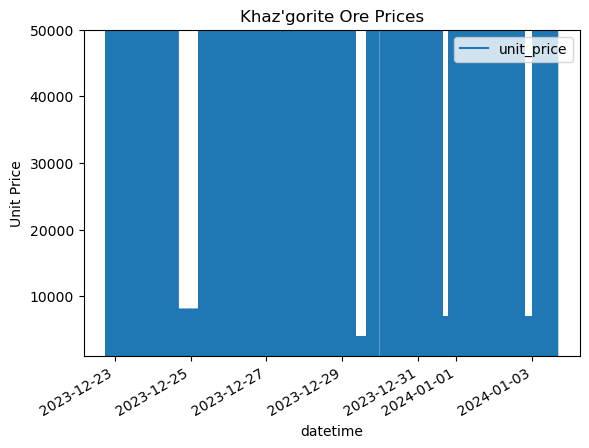

In [11]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt

# Assuming you've already created your plot
plot = df[df['item.id'] == 152512].plot(x='datetime', y='unit_price', title="Khaz'gorite Ore Prices")
plot.set_ylabel('Unit Price')

# Set custom Y-axis limits
custom_y_min = 1000  # Replace with your chosen minimum value
custom_y_max = 50000  # Replace with your chosen maximum value
plot.set_ylim(custom_y_min, custom_y_max)

# Format the y-axis to display the actual price
plot.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Show the plot
plt.show()



<Axes: title={'center': "Khaz'gorite Ore Prices"}, xlabel='datetime'>

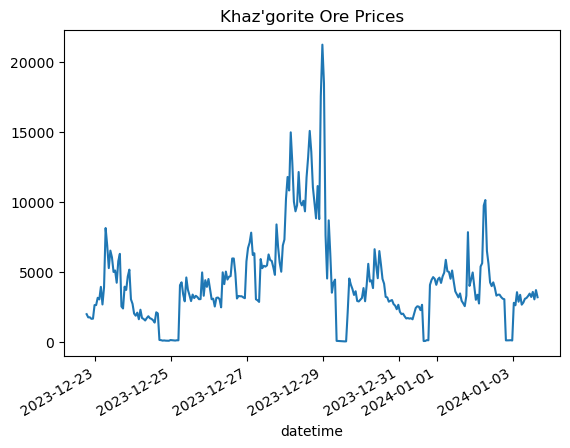

In [12]:
# Look at the mean unit_price of Khaz'gorite Ore by day
df[df['item.id'] == 152512].groupby('datetime')['unit_price'].mean().plot(title="Khaz'gorite Ore Prices")

In [13]:
# Look at the unit_price of Vibrant Wildercloth Bolt without scientific notation
df[df['item.id'] == 158378]['unit_price'].describe()


count    27926.00
mean      4595.39
std      46131.48
min          0.08
25%          0.40
50%          0.43
75%          0.90
max     494420.00
Name: unit_price, dtype: float64

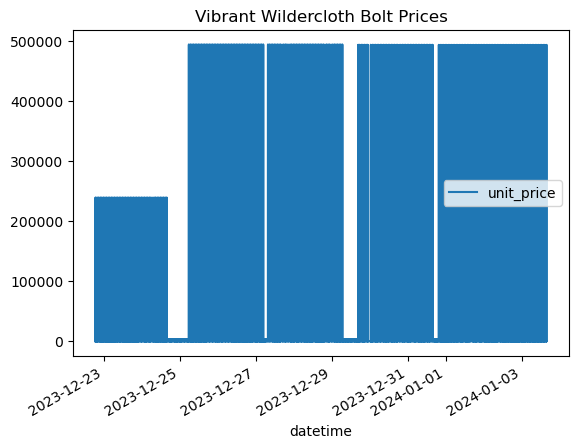

In [14]:
# Visualize the unit_price of Vibrant Wildercloth Bolt over time
plot = df[df['item.id'] == 158378].plot(x='datetime', y='unit_price', title='Vibrant Wildercloth Bolt Prices')

<Axes: title={'center': 'Vibrant Wildercloth Bolt Prices'}, xlabel='datetime'>

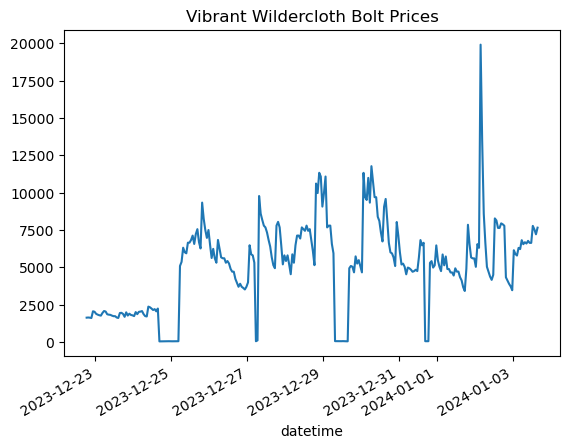

In [15]:
# Look at the mean unit_price of Vibrant Wildercloth Bolt by day
df[df['item.id'] == 158378].groupby('datetime')['unit_price'].mean().plot(title='Vibrant Wildercloth Bolt Prices')

In [16]:
# Look at the unit_price of Lustrous Scaled Hide without scientific notation
df[df['item.id'] == 154722]['unit_price'].describe()

count     41573.00
mean       5772.46
std       64234.12
min           0.01
25%           0.10
50%           0.17
75%           0.92
max     1000000.00
Name: unit_price, dtype: float64

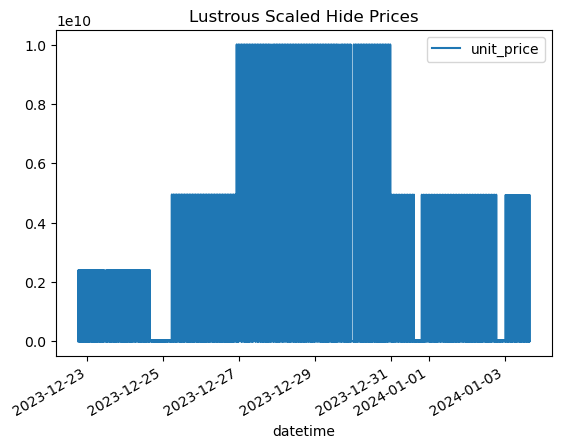

In [9]:
 # Visualize the unit_price of Lustrous Scaled Hide over time without scientific notation being used for the y-axis
plot = df[df['item.id'] == 154722].plot(x='datetime', y='unit_price', title='Lustrous Scaled Hide Prices')

<Axes: title={'center': 'Lustrous Scaled Hide Prices'}, xlabel='datetime'>

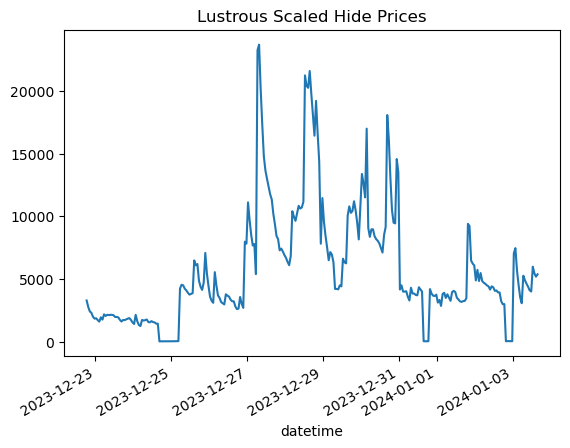

In [18]:
# Look at the mean unit_price of Lustrous Scaled Hide by day
df[df['item.id'] == 154722].groupby('datetime')['unit_price'].mean().plot(title='Lustrous Scaled Hide Prices')

In [19]:
# Look at the unit_price of Chromatic Dust without scientific notation
df[df['item.id'] == 152875]['unit_price'].describe()

count    23068.00
mean      4993.77
std      47867.29
min          0.10
25%          1.00
50%          1.13
75%          5.00
max     494420.00
Name: unit_price, dtype: float64

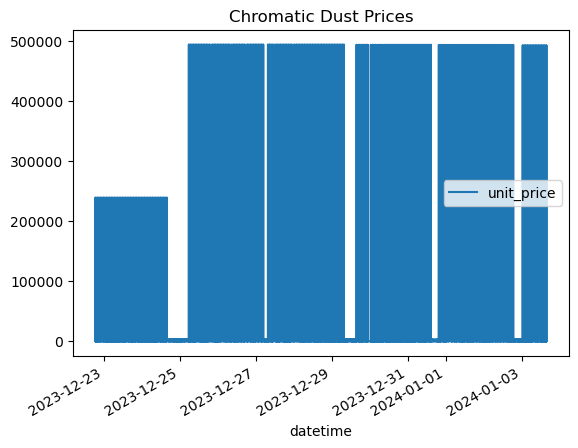

In [20]:
# Visualize the unit_price of Chromatic Dust over time
plot = df[df['item.id'] == 152875].plot(x='datetime', y='unit_price', title='Chromatic Dust Prices')

<Axes: title={'center': 'Chromatic Dust Prices'}, xlabel='datetime'>

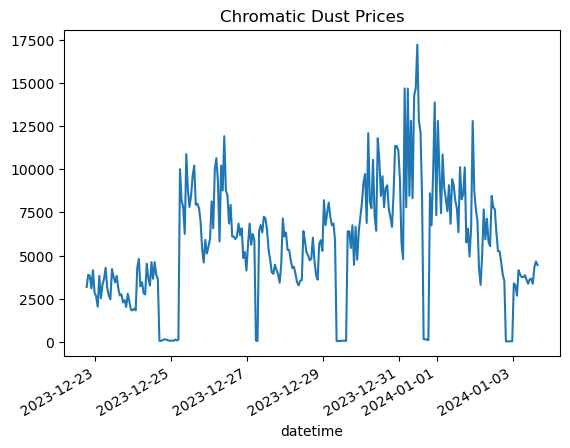

In [25]:
# visualize the mean unit_price of Chromatic Dust by day
df[df['item.id'] == 152875].groupby('datetime')['unit_price'].mean().plot(title='Chromatic Dust Prices')

In [23]:
# Look at the unit_price of Dracothyst shard without scientific notation
df[df['item.id'] == 152877]['unit_price'].describe()

count    34859.00
mean      3640.08
std      39978.51
min         19.00
25%         28.75
50%         38.51
75%         41.18
max     494420.00
Name: unit_price, dtype: float64

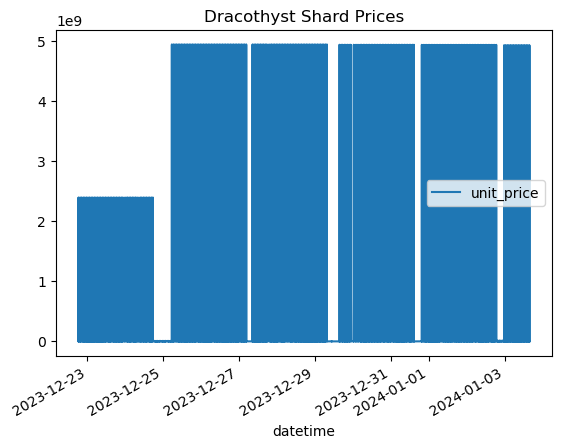

In [8]:
# Visualize the unit_price of Dracothyst shard over time
plot = df[df['item.id'] == 152877].plot(x='datetime', y='unit_price', title='Dracothyst Shard Prices')

<Axes: title={'center': 'Dracothyst Shard Prices'}, xlabel='datetime'>

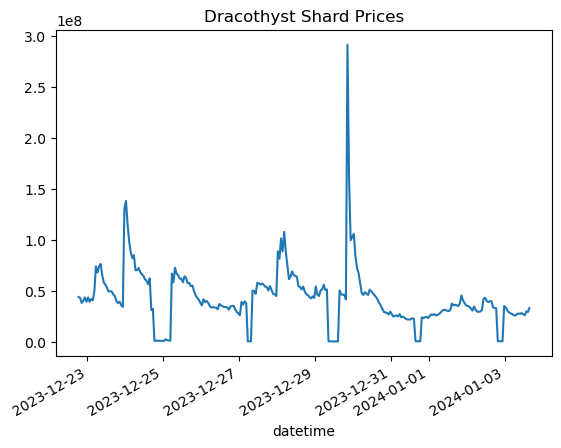

In [7]:
# Visualize the mean unit_price of Dracothyst shard by day
df[df['item.id'] == 152877].groupby('datetime')['unit_price'].mean().plot(title='Dracothyst Shard Prices')

In [27]:
# Look at the unit_price of Bubble Poppy without scientific notation
df[df['item.id'] == 152505]['unit_price'].describe()

count    35442.00
mean      3436.01
std      40133.69
min          0.40
25%          2.22
50%          2.49
75%          3.28
max     600000.80
Name: unit_price, dtype: float64

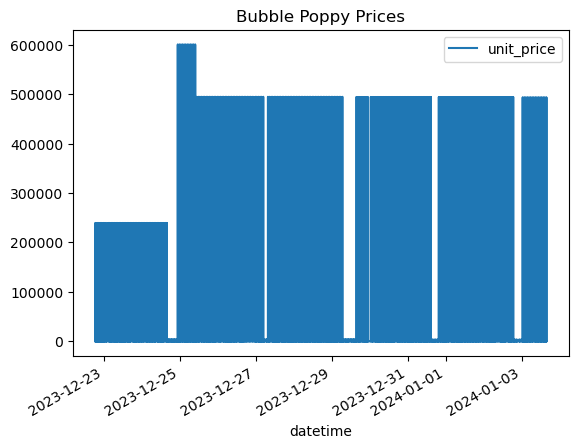

In [28]:
# Visualize the unit_price of Bubble Poppy over time
plot = df[df['item.id'] == 152505].plot(x='datetime', y='unit_price', title='Bubble Poppy Prices')

<Axes: title={'center': 'Bubble Poppy Prices'}, xlabel='datetime'>

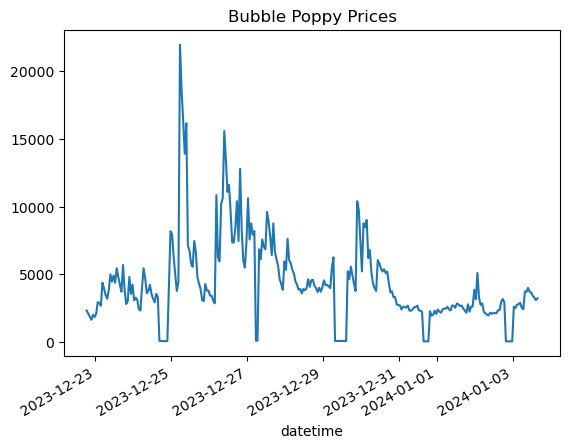

In [29]:
# Look at the mean unit_price of Bubble Poppy by day
df[df['item.id'] == 152505].groupby('datetime')['unit_price'].mean().plot(title='Bubble Poppy Prices')

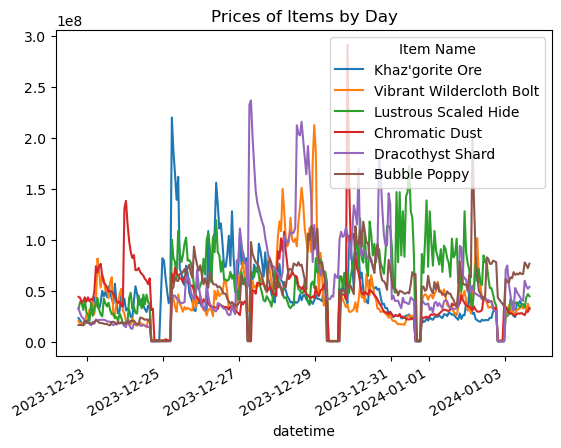

In [28]:
# Create a new data frame containing only the details of the items we're interested in
df2 = df[df['item.id'].isin([152512, 158378, 154722, 152875, 152877, 152505])]

# Look at the mean unit_price of each item by day. Unstack the data to make it easier to plot. Make sure to display the price in gold and not scientific.
plot = df2.groupby(['datetime', 'item.id'])['unit_price'].mean().unstack().plot(title='Prices of Items by Day')

# Replace the label item.id with the item names
plot.legend(title='Item Name', labels=['Khaz\'gorite Ore', 'Vibrant Wildercloth Bolt', 'Lustrous Scaled Hide', 'Chromatic Dust', 'Dracothyst Shard', 'Bubble Poppy'])

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt

# Show the plot
plt.show()


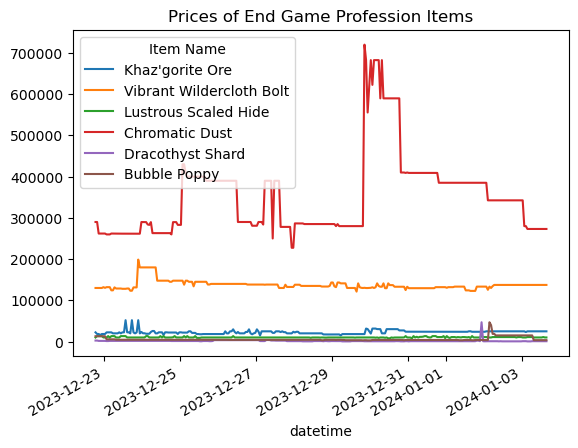

In [12]:
df2.groupby(['datetime', 'item.id'])['unit_price'].agg(lambda x: x.mode()[0]).unstack().plot(title='Prices of End Game Profession Items')
# Replace the label item.id with the item names
plt.legend(title='Item Name', labels=['Khaz\'gorite Ore', 'Vibrant Wildercloth Bolt', 'Lustrous Scaled Hide', 'Chromatic Dust', 'Dracothyst Shard', 'Bubble Poppy'])